# How to apply Bayesian vector autoregression to multivariate time series prediction?

Author: Xinyu Chen (陈新宇, mail to: chenxy346@mail2.sysu.edu.cn)

**About this notebook**:

> This notebook is aimed to introduce an unfamiliar reader to Bayesian modeling for vector autoregressive time series. We will discuss the basics of autoregressive models, use the Gaussian-Wishart distribution as a conjugate prior for posterior inference, and give an intuitive example of using this model for spatiotemporal multivariate time series prediction.

**Quick run**:

This notebook is publicly available for any usage at our data imputation project. Please click [**transdim**](https://github.com/xinychen/transdim).


## 1. Vector autoregression (VAR) model

Vector autoregession (VAR) model is a type of time series model that describes the joint dynamics of multivariate time series data. Let $\boldsymbol{x}_{t}$ be a $R\times 1$ vector (time series variables) that takes values in $\mathbb{R}^{R}$, the temporal evolution of $\boldsymbol{x}_{t}$ can be described by the VAR(d):

$$\boldsymbol{x}_{t}=A_{1} \boldsymbol{x}_{t-h_1}+\cdots+A_{d}\boldsymbol{x}_{t-h_d}+\boldsymbol{\epsilon}_{t},~t=h_d+1,...,T,$$
where $d$ denotes the order of vector autoregressions. $A_{k}\in\mathbb{R}^{R\times R}$ are coefficient matrices and $\boldsymbol{\epsilon}_{t}\in\mathbb{R}^{R}$ is an unobservable zero mean white noise vector (with time invariant covariance matrix $\Lambda$).

For example, a bivariate VAR(2) model (e.g., time lags are $\left\{1,2\right\}$) has the form:

$$\begin{aligned}\left[\begin{array}{l}{x_{1 t}} \\ {x_{2 t}}\end{array}\right]=&+\left[\begin{array}{cc}{a_{11}^{(1)}} & {a_{12}^{(1)}} \\ {a_{21}^{(1)}} & {a_{22}^{(1)}}\end{array}\right]\left[\begin{array}{l}{x_{1 t-1}} \\ {x_{2 t-1}}\end{array}\right] +\left[\begin{array}{cc}{a_{11}^{(2)}} & {a_{12}^{(2)}} \\ {a_{21}^{(2)}} & {a_{22}^{(2)}}\end{array}\right]\left[\begin{array}{l}{x_{1 t-2}} \\ {x_{2 t-2}}\end{array}\right]+\left[\begin{array}{c}{\varepsilon_{1 t}} \\ {\varepsilon_{2 t}}\end{array}\right] \end{aligned}.$$

For better understanding vector autoregressions, we could rewrite the VAR(d) as the following form:

$$\boldsymbol{x}_{t}=A\tilde{\boldsymbol{x}}_{t}+\boldsymbol{\epsilon}_{t},~t=h_d+1,...,T,$$
where we let

$$A=\left[A_1,A_2,...,A_d\right]\in\mathbb{R}^{R\times (Rd)},$$
and 

$$\tilde{\boldsymbol{x}}_{t}=\left[\begin{array}{l}{\boldsymbol{x}_{t-h_1}} \\ \vdots \\ {\boldsymbol{x}_{t-h_d}}\end{array}\right]\in\mathbb{R}^{(Rd)\times 1}.$$

> **Q1: Can we use flexible time lags?**

> **Q2: Is it possible to remove the intercept?**

## 2. Bayesian VAR

First of all, we assume that the time series observations are Gaussian distributed with

$$\boldsymbol{x}_{t}\sim\mathcal{N}\left(A\tilde{\boldsymbol{x}_{t}},\Lambda^{-1}\right).$$

Given observations $\boldsymbol{x}_{h_d+1},...,\boldsymbol{x}_{T}$, we are interested in learning some order-$d$ autoregressive model, therefore, the goal is to learn coefficient matrix $A$ and $\Lambda$. In such case, we could take a Bayesian approach by placing conjugate priors on these parameters. The prior of $\Lambda$ is Wishart:

$$\Lambda\sim\mathcal{W}\left(W_0,\nu_0\right),$$
and the prior of coefficient matrix $A$ is assumed over its rows $\boldsymbol{a}_{r}\in\mathbb{R}^{Rd}$:

$$\boldsymbol{a}_{r}\sim\mathcal{N}\left(\boldsymbol{\mu}_{0},\Lambda_{0}^{-1}\right),~r=1,...,R.$$

> **Q3: Placing conjugate prior on rows of the coefficient matrix $A$ is correct?**

## 3. Posterior distribution of coefficient matrix $A\in\mathbb{R}^{R\times (Rd)}$

- Likelihood:

$$\begin{aligned}
\mathcal{L}\left(\boldsymbol{x}_{h_d+1,r},...,\boldsymbol{x}_{T,r}\mid \boldsymbol{a}_{r},\lambda_{rr}\right)&=\prod_{t=h_d+1}^{T}p\left(x_{tr}\mid \boldsymbol{a}_{r},\lambda_{rr}\right) \\
&\propto\exp\left\{-\frac{1}{2}\sum_{t=h_d+1}^{T}\left({x}_{tr}-\boldsymbol{a}_{r}^{\top}\tilde{\boldsymbol{x}}_{t}\right)\lambda_{rr}\left({x}_{tr}-\boldsymbol{a}_{r}^{\top}\tilde{\boldsymbol{x}}_{t}\right)^{\top}\right\},~\forall r.
\end{aligned}
$$

- Prior:

$$p\left(\boldsymbol{a}_{r}\right)\propto \exp\left\{\left(\boldsymbol{a}_{r}-\boldsymbol{\mu}_{0}\right)^\top\Lambda_{0}\left(\boldsymbol{a}_{r}-\boldsymbol{\mu}_{0}\right)\right\}.$$

- **Posterior**:

$$\boldsymbol{a}_{r}\sim\mathcal{N}\left(\boldsymbol{\mu}_{r}^{*},\left(\Lambda_{r}^{*}\right)^{-1}\right)$$
with

$$\begin{aligned}
\Lambda_{r}^{*}&=\sum_{t=h_d+1}^{T}\lambda_{rr}\tilde{\boldsymbol{x}}_{t}\tilde{\boldsymbol{x}}_{t}^{\top}+\Lambda_0, \\
\boldsymbol{\mu}_{r}^{*}&=\left(\Lambda_{r}^{*}\right)^{-1}\left(\sum_{t=h_d+1}^{T}\lambda_{rr}x_{tr}\tilde{\boldsymbol{x}}_{t}+\Lambda_0\boldsymbol{\mu}_{0}\right).
\end{aligned}$$

## 4. Posterior distribution of covariance $\Lambda\in\mathbb{R}^{R\times R}$

- Likelihood:

$$\begin{aligned}
\mathcal{L}\left(\boldsymbol{x}_{h_d+1},...,\boldsymbol{x}_{T}\mid A,\Lambda\right)&=\prod_{t=h_d+1}^{T}p\left(\boldsymbol{x}_{t}\mid A,\Lambda\right) \\
&\propto\left|\Lambda\right|^{(T-h_d)/2}\exp\left\{-\frac{1}{2}\sum_{t=h_d+1}^{T}\left(\boldsymbol{x}_{t}-A\tilde{\boldsymbol{x}}_{t}\right)^\top\Lambda\left(\boldsymbol{x}_{t}-A\tilde{\boldsymbol{x}}_{t}\right)\right\}. \\
\end{aligned}$$

- Prior:

$$p\left(\Lambda\right)\propto\left|\Lambda\right|^{\left(\nu_0-R-1\right)/2}\exp\left\{-\frac{1}{2}\text{tr}\left(W_{0}^{-1}\Lambda\right)\right\}.$$

- **Posterior**:

$$\Lambda\sim\mathcal{W}\left(W^{*},\nu^{*}\right)$$
with

$$W^{*}=\left[W_0^{-1}+\sum_{t=h_d+1}^{T}\left(\boldsymbol{x}_{t}-A\tilde{\boldsymbol{x}}_{t}\right)\left(\boldsymbol{x}_{t}-A\tilde{\boldsymbol{x}}_{t}\right)^{\top}\right]^{-1},~\nu^{*}=\nu_0+T-h_d.$$

## 5. Define Bayesian VAR (`bvar`) with `Numpy`

In [1]:
import numpy as np
from numpy.random import multivariate_normal as mvnrnd
from scipy.stats import wishart
from numpy.linalg import inv as inv

import numpy as np
def ten2mat(tensor, mode):
    return np.reshape(np.moveaxis(tensor, mode, 0), (tensor.shape[mode], -1), order = 'F')

def mat2ten(mat, tensor_size, mode):
    index = list()
    index.append(mode)
    for i in range(tensor_size.shape[0]):
        if i != mode:
            index.append(i)
    return np.moveaxis(np.reshape(mat, list(tensor_size[index]), order = 'F'), 0, mode)

def bvar(X, A, time_lags, maxiter):
    """
    X: (T,R) matrix.
    A: (R,R,d) coefficient matrix.
    """
    
    T, R = X.shape
    d = time_lags.shape[0]
    
    W0 = np.eye(R)
    nu0 = R
    
    A_plus = np.zeros((R, R, d))
    X_new_plus = np.zeros((T + 1, R))
    for it in range(maxiter[0]):
        mat0 = np.zeros((R, R))
        for t in range(np.max(time_lags), T):
            vec = X[t, :] - np.matmul(ten2mat(A, 0), X[t - time_lags, :].reshape([R * d]))
            mat0 += np.outer(vec, vec)
        Lambda = wishart(df = nu0 + T - np.max(time_lags), scale = inv(inv(W0) + mat0), seed = None).rvs()
    
        A_mat = np.zeros((R, R * d))
        for r in range(R):
            mat0 = np.zeros((T - np.max(time_lags), R * d))
            for t in range(np.max(time_lags), T):
                mat0[t - np.max(time_lags), :] = X[t - time_lags, :].reshape([R * d])
            inv_var_Lambda = inv(Lambda[r, r] * np.matmul(mat0.T, mat0) + np.eye(R * d))
            var_mu = Lambda[r, r] * np.einsum('ij, i -> j', mat0, X[np.max(time_lags) : T, r])
            A_mat[r, :] = mvnrnd(np.matmul(inv_var_Lambda, var_mu), inv_var_Lambda)
        A = mat2ten(A_mat, np.array([R, R, d]), 0)
    
        X_new = np.zeros((T + 1, R))
        X_new[0 : T, :] = X
        X_new[T, :] = np.matmul(ten2mat(A, 0), X[t - time_lags, :].reshape([R * d]))
        
        if it + 1 > maxiter[0] - maxiter[1]:
            A_plus += A
            X_new_plus += X_new
            
        A = A_plus/maxiter[1]
        X_new = X_new_plus/maxiter[1]
        
    return X_new, A

# 6. Spatiotemporal multivariate time series data

Now we have a spatiotemporal traffic speed dataset collected from 214 road segments. As an example, we only choose the data of first 3 road segments in the following.

In [2]:
import scipy.io

tensor = scipy.io.loadmat('../Guangzhou-data-set/tensor.mat')
tensor = tensor['tensor']
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])
X = dense_mat[0 : 3, 0 : 7 * 144].T

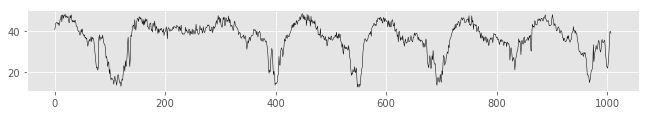

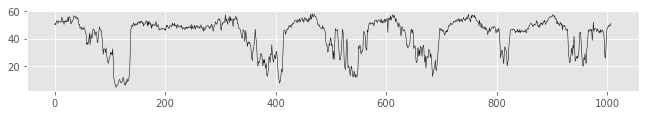

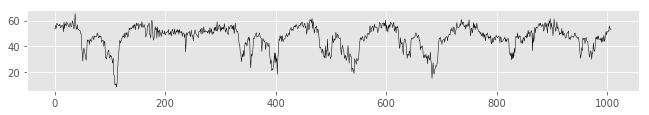

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
for i in range(3):
    fig = plt.figure(figsize = (10, 1.5))
    ax = fig.add_axes([0.10, 0.22, 0.85, 0.75])
    plt.plot(X[:, i], color = "black", linewidth = 0.5)
    plt.show()

Figure 1. Three panels from top to bottom are traffic speed time series corresponding to different road segments. Time interval of traffic measurements is 10 minutes, in other words, the curve visulaized in each panel includes 1008 data points ($144\times 7=1008$, 144 observations per day).

# 7. Define a single-step rolling predictior

In [33]:
import time
start = time.time()

time_lags = np.arange(144)#([1, 2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12, 144])
R = X.shape[1]
d = time_lags.shape[0]

maxiter = np.array([20, 10])
pred_steps = 144 * 5
back_steps = 144 * 2
start_step = X.shape[0] - pred_steps

A_tensor = 0.1 * np.random.rand(R, R, d)
mat_hat = np.zeros((pred_steps, R))
for t in range(pred_steps):
    if t == 0:
        X0, A = bvar(X[0 : t + start_step, :], A_tensor, time_lags, maxiter)
        A_tensor = A.copy()
    else:
        X0, A = bvar(X[t + start_step - back_steps : t + start_step, :], A_tensor, time_lags, maxiter)
        A_tensor = A.copy()
    mat_hat[t, :] = X0[-1, :]
    
    if (t + 1) % 40 == 0:
        print('The current time step is {}.'.format(t+1))
        print(X[t + start_step - 1, :])
        print(X[t + start_step, :])
        print(X0[-2, :])
        print(X0[-1, :])
        print()

end = time.time()
print('Running time: %d seconds'%(end - start))

The current time step is 40.
[45.21  54.107 53.764]
[43.168 55.091 57.945]
[45.21  54.107 53.764]
[45.73157697 53.96496499 54.36295067]

The current time step is 80.
[40.181 31.997 47.01 ]
[38.924 22.81  47.369]
[40.181 31.997 47.01 ]
[39.93195052 31.3093383  47.69462915]

The current time step is 120.
[27.616 10.312 45.332]
[23.61   7.19  44.471]
[27.616 10.312 45.332]
[26.99305179  9.26050716 48.73037432]

The current time step is 160.
[47.135 54.268 56.835]
[47.791 54.817 58.569]
[47.135 54.268 56.835]
[45.41242929 54.94144989 60.4253001 ]

The current time step is 200.
[37.247 47.343 35.634]
[37.57  48.053 31.708]
[37.247 47.343 35.634]
[36.97331468 48.52194914 35.49666059]

The current time step is 240.
[31.341 17.061 32.87 ]
[32.354 20.806 31.412]
[31.341 17.061 32.87 ]
[32.25845914 17.6000953  32.17651626]

The current time step is 280.
[36.049 46.501 49.166]
[36.284 44.699 50.17 ]
[36.049 46.501 49.166]
[38.08376402 46.78135991 49.54332505]

The current time step is 320.
[42.31

In [37]:
mat = X[start_step : X.shape[0], :]
mat0 = X[X.shape[0] - pred_steps - 1 : X.shape[0] - 1, :]
pos = np.where(mat != 0)
print('MAPE: {}'.format(np.sum(np.abs(mat[pos] - mat_hat[pos])/mat[pos])/mat[pos].shape[0]))
print('RMSE: {}'.format(np.sqrt(np.sum((mat[pos] - mat_hat[pos]) ** 2)/mat[pos].shape[0])))

MAPE: 0.07046300287281775
RMSE: 3.473433366601927


# 8. Analysis of prediction results

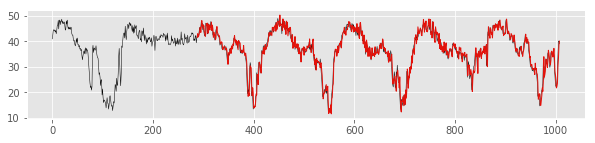

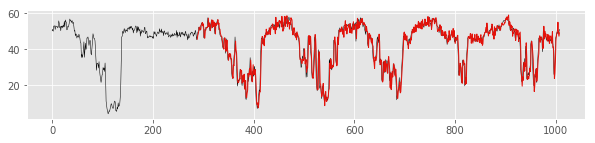

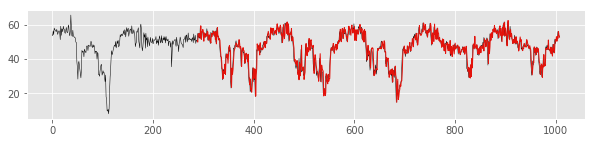

In [38]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
for i in range(3):
    fig = plt.figure(figsize = (10, 2))
    plt.plot(X[:, i], color = "black", linewidth = 0.5)
    plt.plot(list(range(X.shape[0] - pred_steps, X.shape[0])), mat_hat[:, i], color = "#e3120b", linewidth = 1.0)